# Scraping content from sanook new

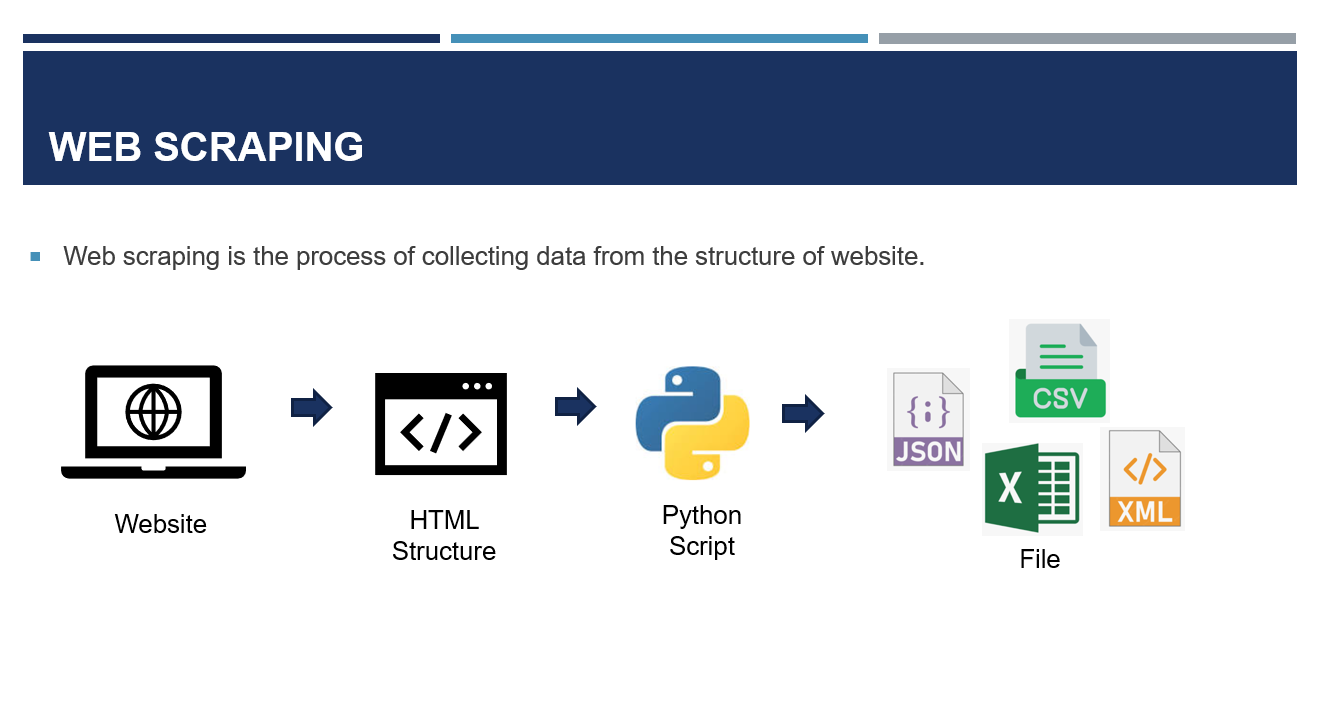

## Requests

In [23]:
import requests
import re

Request เป็น Python library ที่ใช้งานร่วมกับ HTTP ซึ่งเอกสารของ Request คือ  https://requests.readthedocs.io/en/latest/

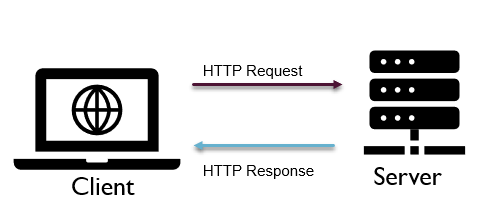

In [24]:
# กำหนด url
# url='https://www.sanook.com/money/896451/'
url='https://www.bbc.com/news/science-environment-64815782'


In [25]:
#  การ request ข้อมูลออกมาจาก website
page = requests.get(url)
page

<Response [200]>

In [26]:
# Status code ของ respond
page.status_code

200


**Example of HTTP response status codes**

*   200 OK :success
*   400 Bad Request
* 404 Not Found
* 500 Internal Server Error


**HTTP response status codes by class**


*   Informational responses (100 – 199)
*   Successful responses (200 – 299)
*Redirection messages (300 – 399)
*Client error responses (400 – 499)
*Server error responses (500 – 599)

Referernce : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status?retiredLocale=th



## BeautifulSoup

In [27]:
from bs4 import BeautifulSoup

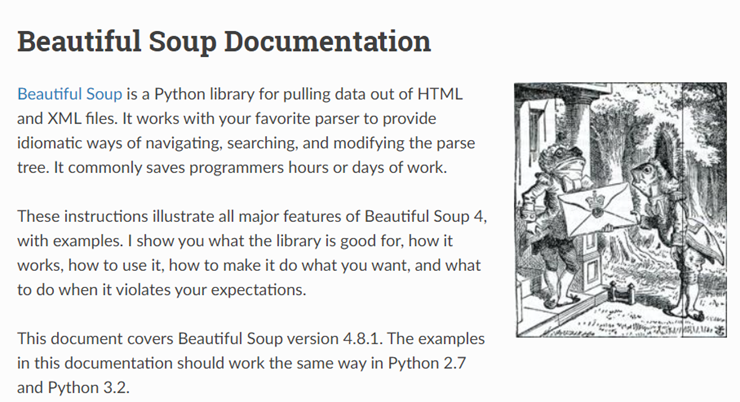

Beautiful soup link :https://beautiful-soup-4.readthedocs.io/en/latest/

In [28]:
# ใช้ BeautifulSoup อ่านข้อมูลที่ได้รับมาจากการ request
soup = BeautifulSoup(page.content, 'html.parser')

In [29]:
soup.prettify()

'<!DOCTYPE html>\n<html class="no-js" lang="en-GB">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <title data-rh="true">\n   Ocean treaty: Historic agreement reached after decade of talks - BBC News\n  </title>\n  <meta content="Countries have reached a landmark agreement to help put 30% of the world\'s oceans into protection." data-rh="true" name="description"/>\n  <meta content="#FFFFFF" data-rh="true" name="theme-color"/>\n  <meta content="https://www.facebook.com/bbcnews" data-rh="true" property="article:author"/>\n  <meta content="100004154058350" data-rh="true" property="fb:admins"/>\n  <meta content="1609039196070050" data-rh="true" property="fb:app_id"/>\n  <meta content="1143803202301544,317278538359186,1392506827668140,742734325867560,185246968166196,156060587793370,137920769558355,193435954068976,21263239760,156400551056385,929399697073756,154344434967,228735667216,80758950658,260212261199,294662213128,1086451

## HTML element syntax

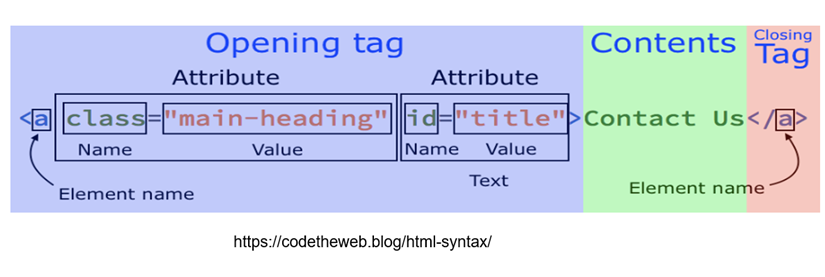

In [30]:
# แสดง element แรกที่มี tag h1
soup.h1

<h1 class="ssrcss-15xko80-StyledHeading e1fj1fc10" id="main-heading" tabindex="-1">Ocean treaty: Historic agreement reached after decade of talks</h1>

In [31]:
# แสดงข้อความของ element แรกที่มี tag h1
soup.h1.text

'Ocean treaty: Historic agreement reached after decade of talks'

In [32]:
# แสดง element แรกที่มี tag p
soup.p

<p class="ssrcss-1q0x1qg-Paragraph eq5iqo00"><b class="ssrcss-hmf8ql-BoldText e5tfeyi3">Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.</b></p>

In [33]:
# แสดง element ทั้งหมด tag p
soup.find_all('p')

[<p class="ssrcss-1q0x1qg-Paragraph eq5iqo00"><b class="ssrcss-hmf8ql-BoldText e5tfeyi3">Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.</b></p>,
 <p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">The High Seas Treaty aims to help place 30% of the seas into protected areas by 2030, to safeguard and recuperate marine nature.</p>,
 <p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">The agreement was reached on Saturday evening, after 38 hours of talks, at UN headquarters in New York.</p>,
 <p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">The negotiations had been held up for years over disagreements on funding and fishing rights.</p>,
 <p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">The last international agreement on ocean protection was signed 40 years ago in 1982 - the UN Convention on the Law of the Sea.</p>,
 <p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">That agreement established an area called the high seas - international waters where all 

In [34]:
# แสดง element ทั้งหมด tag p
text_list=[]
for p_tag in soup.find_all('p'):
    # ข้อความของ element ที่มี tag p
    print(p_tag.text)
    text_list.append(p_tag.text)

Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.
The High Seas Treaty aims to help place 30% of the seas into protected areas by 2030, to safeguard and recuperate marine nature.
The agreement was reached on Saturday evening, after 38 hours of talks, at UN headquarters in New York.
The negotiations had been held up for years over disagreements on funding and fishing rights.
The last international agreement on ocean protection was signed 40 years ago in 1982 - the UN Convention on the Law of the Sea.
That agreement established an area called the high seas - international waters where all countries have a right to fish, ship and do research - but only 1.2% of these waters are protected. 
Marine life living outside these protected areas has been at risk from climate change, overfishing and shipping traffic.
In the latest assessment of global marine species, nearly 10% were found to be at risk of extinction, according to the Interna

In [35]:
# แสดง element ทั้งหมด tag li
for li_tag in soup.find_all('li'):
    # ข้อความของ element ที่มี tag li
    li_tag_text=li_tag.text
    # print(li_tag_text)
    # เลือกเฉพาะข้อความที่มีคำว่า "เดือน"
    if re.search('เดือน',li_tag_text):
      print(li_tag_text)
      text_list.append(li_tag_text)

In [36]:
# แสดง element ทั้งหมด tag a เพื่อที่จะหา link
for link in soup.find_all('a'):
    # print(link)
    # # หา value ของ attribute href
    link_href=link.get('href')
    # print('link only: ',link_href)
    if link_href is not None:
      # เลือกเฉพาะข้อความที่มีคำว่า "www."
      if re.search('www\.',link_href):
          print(link_href)

https://www.bbc.com
https://www.bbc.co.uk/accessibility/
https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/science-environment-64815782
https://www.bbc.com
https://www.bbc.com/news
https://www.bbc.com/sport
https://www.bbc.com/reel
https://www.bbc.com/worklife
https://www.bbc.com/travel
https://www.bbc.com/future
https://www.bbc.co.uk/search?d=NEWS_GNL
https://www.bbc.com
https://www.bbc.com/news
https://www.bbc.com/sport
https://www.bbc.com/reel
https://www.bbc.com/worklife
https://www.bbc.com/travel
https://www.bbc.com/future
https://www.bbc.com/culture
https://www.bbc.com/culture/music
https://www.bbc.co.uk/schedules/p00fzl9m
https://www.bbc.com/weather
https://www.bbc.co.uk/sounds
https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc
https://www.bbc.co.uk/news/science-environment-64839763
https://www.iucn.org/press-release/202212/human-activity-devastating-marine-species-mammals-corals-iucn-red-list
https://www.iucn.org/resources/issues-brie

In [37]:
# แสดง element ทั้งหมด tag img เพื่อที่จะหา link ของรูปภาพ
for link in soup.find_all('img'):
    # print(link)
    # หา value ของ attribute src
    link_img=link.get('src')
    if link_img is not None:
          print(link_img)

https://ichef.bbci.co.uk/news/976/cpsprodpb/24DA/production/_128843490_turtlebbnj.jpg
https://ichef.bbci.co.uk/news/976/cpsprodpb/13D7C/production/_128867218_oceansnegotiations.jpg
https://ichef.bbci.co.uk/news/976/cpsprodpb/135EF/production/_128834397_seasponges.jpg
https://ichef.bbci.co.uk/news/976/cpsprodpb/E7CF/production/_128834395_gettyimages-1297379980.jpg
https://ichef.bbci.co.uk/news/976/cpsprodpb/116C4/production/_128846317_humpbackwhale.jpg
https://ichef.bbci.co.uk/news/976/cpsprodpb/A701/production/_127935724_dugongswimminggettyimages-1204652206.jpg
https://ichef.bbci.co.uk/news/385/cpsprodpb/20C0/production/_128948380_bbcnews20230228_5405.jpg
https://ichef.bbci.co.uk/news/385/cpsprodpb/E93E/production/_128201795_savic2usethis.png
https://ichef.bbci.co.uk/news/385/cpsprodpb/1673C/production/_128946919_2b0ef555-c4c9-4c9d-a085-168c65557f20.jpg
https://ichef.bbci.co.uk/news/385/cpsprodpb/1CCC/production/_128927370_evarline4.jpg
https://ichef.bbci.co.uk/news/385/cpsprodpb/011E/

In [38]:
# แสดง element ทั้งหมด tag p และ  b ทั้งหมด
for bp_tag in soup.find_all(["b", "p"]):
  print(bp_tag,bp_tag.text)

<p class="ssrcss-1q0x1qg-Paragraph eq5iqo00"><b class="ssrcss-hmf8ql-BoldText e5tfeyi3">Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.</b></p> Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.
<b class="ssrcss-hmf8ql-BoldText e5tfeyi3">Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.</b> Nations have reached a historic agreement to protect the world's oceans following 10 years of negotiations.
<p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">The High Seas Treaty aims to help place 30% of the seas into protected areas by 2030, to safeguard and recuperate marine nature.</p> The High Seas Treaty aims to help place 30% of the seas into protected areas by 2030, to safeguard and recuperate marine nature.
<p class="ssrcss-1q0x1qg-Paragraph eq5iqo00">The agreement was reached on Saturday evening, after 38 hours of talks, a

In [39]:
finish section1

SyntaxError: ignored

# Scraping sanook news by sector

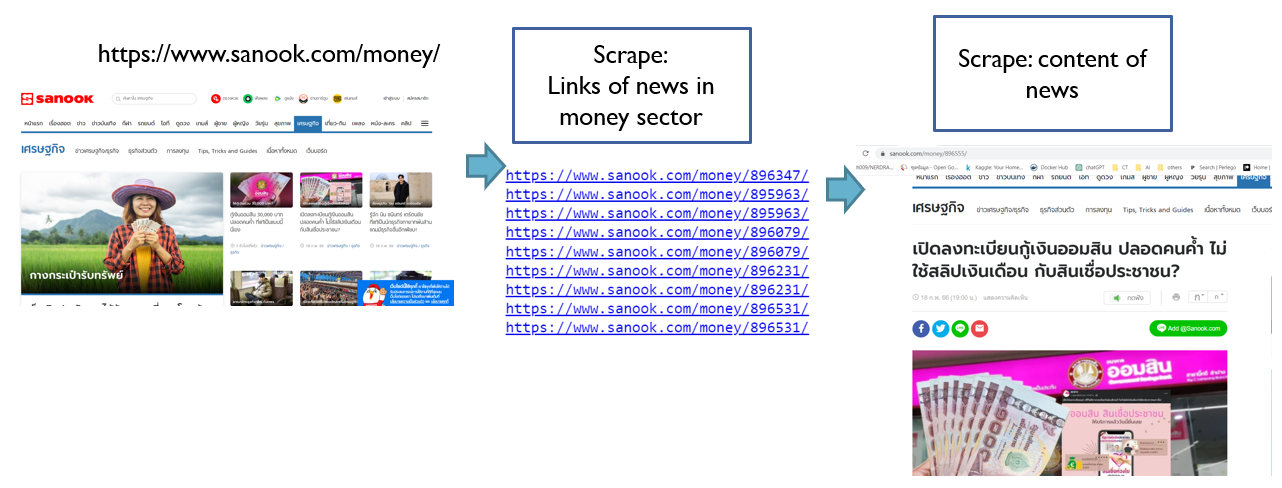

In [40]:
# กำหนด url ของ money sector
urls='https://www.sanook.com/money/'
#  การ request ข้อมูลออกมาจาก website
page = requests.get(urls)
page

<Response [200]>

In [41]:
# ใช้ BeautifulSoup อ่านข้อมูลที่ได้รับมาจากการ request
soup = BeautifulSoup(page.content, 'html.parser')

In [42]:
link_list=[]
# แสดง element ทั้งหมด tag a เพื่อที่จะหา link
for link in soup.find_all('a'):
    # หา value ของ attribute href
    link_=link.get('href')
    # print(link_)
    # เลือกเฉพาะ linkที่มี pattern ของ money/894567(ตัวเลข 6 ตัว)
    if re.search('money\/[\d]{6}',str(link_)):
        # print('selected: ',link_)
        # เก็บ link ไว้ในลิส
        link_list.append(link_)

In [43]:
# ลบ link ที่ซ้ำกันออกไปโดยใช้ function set()
link_list=set(link_list)

In [44]:
df_list=[]
for  url in link_list:
    # การ request ข้อมูลออกมาจาก website
    page1 = requests.get(url)
    # แสดง element ทั้งหมด tag p
    soup1 = BeautifulSoup(page1.content, 'html.parser')
    texts=[]
    for new in soup1.find_all('p'):
        texts.append(new.text)
    df_list.append({'URL':url,'Text':texts,'Section':'money'})

In [45]:
import pandas as pd
# นำ list ที่ได้มาสร้าง dataframe
df=pd.DataFrame(df_list)
df.head()

,URL,Text,Section
0,https://www.sanook.com/money/897655/,"[สนับสนุนเนื้อหา, บัตรสวัสดิการแห่งรัฐ บัตรคนจ...",money
1,https://www.sanook.com/money/898247/,"[สนับสนุนเนื้อหา, สมาคมค้าทองคำรายงานว่า ""ราคา...",money
2,https://www.sanook.com/money/898263/,"[สนับสนุนเนื้อหา, จากกรณีที่ธนาคารเอสวีบี ไฟแน...",money
3,https://www.sanook.com/money/897739/,"[สนับสนุนเนื้อหา, ขุมทรัพย์ ทักษิณ ชินวัตร อดี...",money
4,https://www.sanook.com/money/898059/,"[สนับสนุนเนื้อหา, ราคาทอง Spot ย่อลงแล้วดีดกลั...",money


In [47]:
df['Text'][5]

['สนับสนุนเนื้อหา',
 'วิธีลงทะเบียนรับสิทธิส่วนลดค่าน้ำประปา-ค่าไฟฟ้า สำหรับผู้มีสิทธิบัตรสวัสดิการแห่งรัฐ บัตรคนจน รอบใหม่',
 'จากกรณีที่ประชุม ครม. มีมติเห็นชอบการจัดสรรประชารัฐสวัสดิการใหม่ สำหรับมาตรการบรรเทาภาระค่าไฟฟ้า และค่าน้ำประปา (มาตรการบรรเทาฯ) ซึ่งเป็นหนึ่งในมาตรการการจัดสรรประชารัฐสวัสดิการใหม่ สำหรับผู้ที่ผ่านคุณสมบัติโครงการลงทะเบียนเพื่อสวัสดิการแห่งรัฐปี 2565 (ผู้มีบัตรฯ) โดยมีรายละเอียด ดังนี้',
 'ปัจจุบันประชาชนทั่วไปจะได้รับการสนับสนุนค่าไฟฟ้า จากมาตรการของรัฐบาลโดยการไฟฟ้านครหลวงและการไฟฟ้าส่วนภูมิภาค ซึ่งมีเงื่อนไขว่า หากประชาชนใช้ไฟฟ้าไม่เกิน 50 หน่วยต่อเดือน ติดต่อกันเป็นระยะเวลา 3 เดือน จะได้รับสิทธิใช้ไฟฟ้าฟรี',
 'ดังนั้น ภายใต้มาตรการบรรเทาฯ ให้แก่ผู้มีบัตรฯ จะเป็นกรณีที่ผู้มีบัตรฯ ใช้ไฟฟ้าเกิน 50 หน่วยต่อเดือน โดยจะได้รับสนับสนุนค่าไฟฟ้าวงเงิน 315 บาทต่อครัวเรือนต่อเดือน แต่หากมีการใช้ไฟฟ้าเกิน 315 บาทต่อครัวเรือนต่อเดือน ผู้มีบัตรฯ จะต้องเป็นผู้รับภาระค่าไฟฟ้าด้วยตนเองทั้งหมด',
 'สนับสนุนค่าน้ำประปาวงเงิน 100 บาทต่อครัวเรือนต่อเดือน โดยในกรณีที่ผู้มีบัตรฯ 

จากการ scrape ข้อความข่าวโดยใช้ tag p แล้วเก็บไว้ในรูปแบบของ list จะเห็นว่าตำแหน่งที่ 0 และ 4 ตำแหน่งสุดท้ายไม่ได้มีข้อความที่เกี่ยวข้องกับข่าวจึงได้ทำการตัดออก

In [48]:
# ตัดข้อความในตำแหน่งที่ 0 และ 4 ตำแหน่งสุดท้ายออกไป
df['Text_select']=df['Text'].apply(lambda x:x[1:-4])
# แปลงจากรูปแบบของ list ให้อยู่ในรูปแบบของข้อความ
df['Text_select']=df['Text_select'].apply(lambda x:' '.join(x))

In [49]:
df['Text_select'][7]

'เว็บไซต์ เราเที่ยวด้วยกันเฟส 5 ประกาศจำนวนที่พัก-โรงแรม 560,000 สิทธิ ถูกจองเต็มหมดแล้ว หลังรัฐบาลเปิดให้ประชาชนลงทะเบียนเราเที่ยวด้วยกันเฟส 5 พร้อมกับเริ่มจองโรงแรมที่พักได้ตั้งแต่เมื่อวันที่ 7 มี.ค. 66 ที่ผ่านมา ตั้งแต่เวลา 06.00-23.00 น. เพื่อใช้เดินทางระหว่าง 10 มี.ค.-30 เม.ย. 66 ล่าสุด เว็บไซต์ www.เราเที่ยวด้วยกัน.com ประกาศว่าจำนวนสิทธิเหลือ 0 สิทธิ ณ เวลา 11.00 น. หรือราว 4 วันหลังจากที่เริ่มโครงการก็มีจำนวนผู้จองสิทธิห้องพักเต็มทั้ง 560,000 สิทธิ แล้ว'

In [50]:
# Save ไฟล์ในรูปแบบของ csv
df.to_csv('sanook_money.csv')